In [1]:
library(tidyverse)
library(MLmetrics)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



In [15]:
pandas = read_tsv("~/RIDIR/Datasets/AreaTablesValidation/geopandas_area_table.tsv", col_names = c("SID", "TID", "pandas")) %>%
    mutate(SID = paste0("S",SID), TID = paste0("T", TID)) %>%
    arrange(desc(pandas))
head(pandas)
nrow(pandas)

Parsed with column specification:
cols(
  SID = col_double(),
  TID = col_double(),
  pandas = col_double()
)


SID,TID,pandas
S42101005200,T42101000052,0.0010725117
S42101005000,T42101000050,0.0007968057
S42101035400,T42101000354,0.0007944619
S42101012300,T42101000123,0.0006089372
S42101022300,T42101000223,0.0005563056
S42101034300,T42101000343,0.0005395094


[1] 1576

In [14]:
spark = read_tsv("~/RIDIR/Datasets/AreaTablesValidation/geospark_area_table.tsv", col_names = c("SID", "TID", "spark")) %>%
    arrange(desc(spark))
head(spark)
nrow(spark)

Parsed with column specification:
cols(
  SID = col_character(),
  TID = col_character(),
  spark = col_double()
)


SID,TID,spark
S42101005200,T42101000052,0.0010725117
S42101035400,T42101000354,0.0007944619
S42101012300,T42101000123,0.0006089372
S42101022300,T42101000223,0.0005563056
S42101034300,T42101000343,0.0005395094
S42101036400,T42101000364,0.0004507524


[1] 1535

In [9]:
table = pandas %>% left_join(spark, by = c("SID", "TID"))
head(table)


SID,TID,pandas,spark
S42101000100,T42101000001,7.105410e-05,7.105410e-05
S42101000100,T42101000127,2.569501e-07,2.569501e-07
S42101000100,T42101000128,7.765014e-07,7.765014e-07
S42101000100,T42101000129,6.323971e-07,6.323971e-07
S42101000100,T42101000366,2.480105e-06,2.480105e-06
S42101000200,T42101000001,1.360001e-06,1.360001e-06


In [11]:
head(table %>% filter(is.na(spark)))

SID,TID,pandas,spark
S42101002600,T42101000026,7.851250e-05,NA
S42101002600,T42101000366,1.384659e-06,NA
S42101004300,T42101000026,2.224740e-06,NA
S42101004300,T42101000043,2.742320e-04,NA
S42101004900,T42101000043,3.448204e-06,NA
S42101004900,T42101000044,2.281183e-06,NA


In [12]:
table = spark %>% inner_join(pandas, by = c("SID", "TID")) %>% 
    mutate(diff = abs(pandas - spark))
head(table)
nrow(table)

SID,TID,spark,pandas,diff
S42101032400,T42101000327,4.135117e-06,4.135117e-06,0
S42101032400,T42101000324,1.274564e-04,1.274564e-04,0
S42101014000,T42101000147,1.209101e-06,1.209101e-06,0
S42101014000,T42101000146,5.519013e-07,5.519013e-07,0
S42101014000,T42101000140,4.206096e-05,4.206096e-05,0
S42101014000,T42101000141,1.432142e-06,1.432142e-06,0


[1] 1535

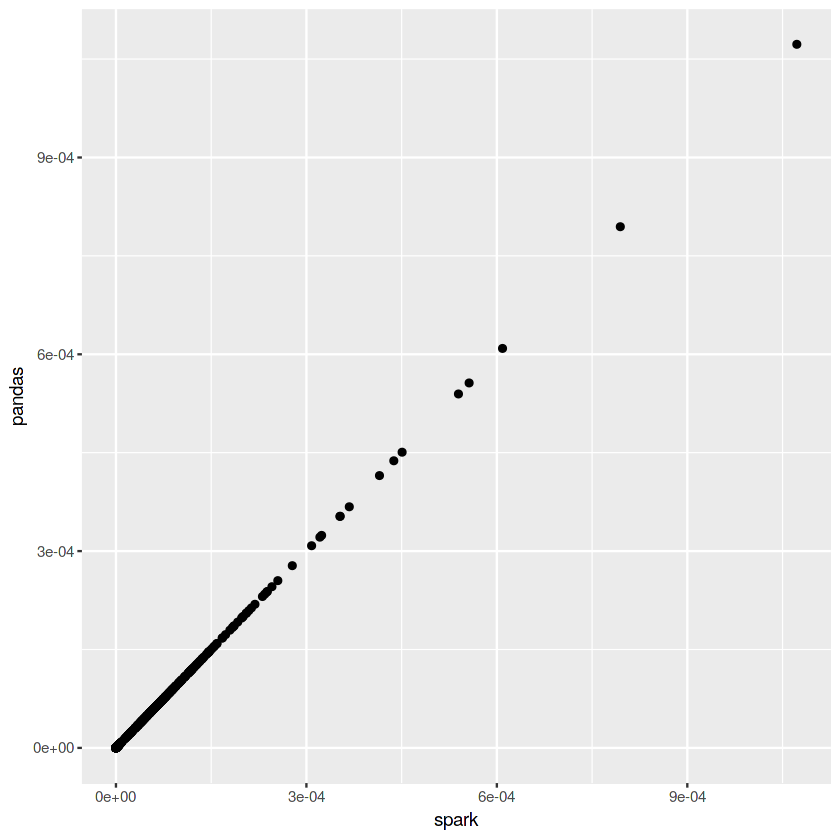

In [13]:
ggplot(data = table, aes(x = spark, y = pandas)) + geom_point()

In [8]:
print(paste("R2:   ", R2_Score(table$spark, table$pandas)))
print(paste("MAE:  ",      MAE(table$spark, table$pandas)))
print(paste("MSE:  ",      MSE(table$spark, table$pandas)))
print(paste("RMSE: ",     RMSE(table$spark, table$pandas)))
print(paste("RAE:  ",      RAE(table$spark, table$pandas)))
print(paste("MAPE: ",     MAPE(table$spark, table$pandas)))


[1] "R2:    1"
[1] "MAE:   1.64695836278361e-23"
[1] "MSE:   5.64115177666031e-44"
[1] "RMSE:  2.37511089776042e-22"
[1] "RAE:   4.91499517530793e-19"
[1] "MAPE:  1.70539285779528e-17"
